In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense
from keras.callbacks import EarlyStopping

2024-01-04 19:50:57.699603: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-04 19:50:57.701027: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-04 19:50:57.724485: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 19:50:57.724517: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 19:50:57.725267: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [2]:
dataset = pd.read_csv("./LSTM_16notes.csv")
df = dataset.copy()

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

X_train = np.array([ eval(k) for k in df_train['X']])
X_test = np.array([ eval(k) for k in df_valid['X']])
y_train = np.array([ eval(k) for k in df_train['Y']])
y_test = np.array([ eval(k) for k in df_valid['Y']])

nombreDeNotesPrecedentes = len(X_train[0]) # nombre de notes précédentes à prendre en compte
formatNote = len(X_train[0][0]) # valeur de la note, durée, durée avant prochaine note

Vérifions l'influence du nombre de neurones sur la performance du réseau de neurones.

2024-01-04 19:52:52.045211: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:274] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-01-04 19:52:52.045240: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:129] retrieving CUDA diagnostic information for host: guill-Precision-3560
2024-01-04 19:52:52.045244: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:136] hostname: guill-Precision-3560
2024-01-04 19:52:52.045342: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:159] libcuda reported version is: 470.223.2
2024-01-04 19:52:52.045353: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] kernel reported version is: 470.223.2
2024-01-04 19:52:52.045355: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:241] kernel version seems to match DSO: 470.223.2


Epoch 1/20
34145/34145 [==============================] - 149s 4ms/step - loss: 33016.7812 - mae: 65.7925 - val_loss: 31997.9199 - val_mae: 60.2995
Epoch 2/20
34145/34145 [==============================] - 150s 4ms/step - loss: 31430.3047 - mae: 63.0315 - val_loss: 31070.1484 - val_mae: 60.9095
Epoch 3/20
34145/34145 [==============================] - 152s 4ms/step - loss: 30432.6270 - mae: 61.9147 - val_loss: 30885.0293 - val_mae: 62.3541
Epoch 4/20
34145/34145 [==============================] - 153s 4ms/step - loss: 30857.2539 - mae: 61.4437 - val_loss: 31896.5547 - val_mae: 59.8579
Epoch 5/20
34145/34145 [==============================] - 156s 5ms/step - loss: 30535.1387 - mae: 61.7019 - val_loss: 32149.7363 - val_mae: 61.4839
Epoch 6/20
34145/34145 [==============================] - 154s 5ms/step - loss: 30681.3633 - mae: 62.1281 - val_loss: 30996.9395 - val_mae: 58.9959
Epoch 7/20
34145/34145 [==============================] - 138s 4ms/step - loss: 30126.5430 - mae: 60.9041 - val_

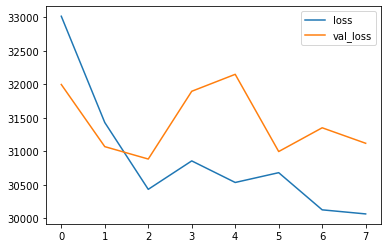

In [3]:
nombreDeNeurones = 60
# ------------------------------
nombreDeBatch = 32          # nombre de subdivisions du jeu de données
nombreDeEpoch = 20          # nombre de fois que l'on va parcourir le jeu de données
nombreDeEpochPatient = 5    # nombre d'epoch sans amélioration avant d'arrêter l'apprentissage

model = Sequential()
model.add( InputLayer(input_shape=(nombreDeNotesPrecedentes, formatNote)) )
model.add( LSTM(nombreDeNeurones, activation='relu') )
model.add( Dense(formatNote) )
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mae'])

early_stopping = EarlyStopping(
    min_delta=0.001, # quantité minimale considérable comme une amélioration
    patience=nombreDeEpochPatient,
    restore_best_weights=True,)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=nombreDeBatch,
    epochs=nombreDeEpoch,
    callbacks=[early_stopping],)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Erreur minimale atteinte : {}".format(history_df['val_loss'].min()))

Epoch 1/20
34145/34145 [==============================] - 219s 6ms/step - loss: 34515.6953 - mae: 69.1708 - val_loss: 32646.9023 - val_mae: 61.7161
Epoch 2/20
34145/34145 [==============================] - 225s 7ms/step - loss: 31067.0156 - mae: 62.5760 - val_loss: 31467.1797 - val_mae: 61.0044
Epoch 3/20
34145/34145 [==============================] - 211s 6ms/step - loss: 30157.4629 - mae: 61.1464 - val_loss: 30544.6484 - val_mae: 61.2973
Epoch 4/20
34145/34145 [==============================] - 210s 6ms/step - loss: 30818.2871 - mae: 61.1324 - val_loss: 31567.7949 - val_mae: 63.6925
Epoch 5/20
34145/34145 [==============================] - 231s 7ms/step - loss: 30386.0605 - mae: 61.3889 - val_loss: 31459.4023 - val_mae: 62.3983
Epoch 6/20
34145/34145 [==============================] - 234s 7ms/step - loss: 30783.2109 - mae: 62.0389 - val_loss: 30648.5762 - val_mae: 61.8760
Epoch 7/20
34145/34145 [==============================] - 234s 7ms/step - loss: 30477.4941 - mae: 61.8939 - val_

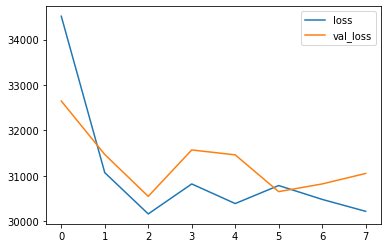

In [4]:
nombreDeNeurones = 140
# ------------------------------
nombreDeBatch = 32          # nombre de subdivisions du jeu de données
nombreDeEpoch = 20          # nombre de fois que l'on va parcourir le jeu de données
nombreDeEpochPatient = 5    # nombre d'epoch sans amélioration avant d'arrêter l'apprentissage

model = Sequential()
model.add( InputLayer(input_shape=(nombreDeNotesPrecedentes, formatNote)) )
model.add( LSTM(nombreDeNeurones, activation='relu') )
model.add( Dense(formatNote) )
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mae'])

early_stopping = EarlyStopping(
    min_delta=0.001, # quantité minimale considérable comme une amélioration
    patience=nombreDeEpochPatient,
    restore_best_weights=True,)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=nombreDeBatch,
    epochs=nombreDeEpoch,
    callbacks=[early_stopping],)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Erreur minimale atteinte : {}".format(history_df['val_loss'].min()))

Epoch 1/20
34145/34145 [==============================] - 329s 10ms/step - loss: 35626.3242 - mae: 71.4086 - val_loss: 33632.8984 - val_mae: 65.0753
Epoch 2/20
34145/34145 [==============================] - 322s 9ms/step - loss: 31548.7090 - mae: 63.2016 - val_loss: 31906.3965 - val_mae: 64.2902
Epoch 3/20
34145/34145 [==============================] - 314s 9ms/step - loss: 31300.2266 - mae: 62.6758 - val_loss: 32499.0215 - val_mae: 63.7476
Epoch 4/20
34145/34145 [==============================] - 303s 9ms/step - loss: 31724.5801 - mae: 63.6117 - val_loss: 32306.8281 - val_mae: 63.5078
Epoch 5/20
34145/34145 [==============================] - 310s 9ms/step - loss: 30533.3984 - mae: 61.9144 - val_loss: 30703.0605 - val_mae: 62.4663
Epoch 6/20
34145/34145 [==============================] - 309s 9ms/step - loss: 30569.4512 - mae: 61.5708 - val_loss: 32539.2734 - val_mae: 63.4112
Epoch 7/20
34145/34145 [==============================] - 307s 9ms/step - loss: 30505.9707 - mae: 61.9213 - val

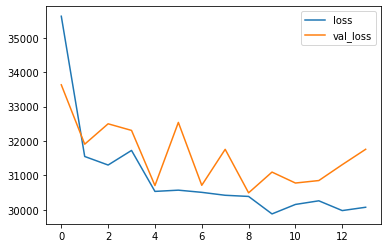

In [5]:
nombreDeNeurones = 180
# ------------------------------
nombreDeBatch = 32          # nombre de subdivisions du jeu de données
nombreDeEpoch = 20          # nombre de fois que l'on va parcourir le jeu de données
nombreDeEpochPatient = 5    # nombre d'epoch sans amélioration avant d'arrêter l'apprentissage

model = Sequential()
model.add( InputLayer(input_shape=(nombreDeNotesPrecedentes, formatNote)) )
model.add( LSTM(nombreDeNeurones, activation='relu') )
model.add( Dense(formatNote) )
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mae'])

early_stopping = EarlyStopping(
    min_delta=0.001, # quantité minimale considérable comme une amélioration
    patience=nombreDeEpochPatient,
    restore_best_weights=True,)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=nombreDeBatch,
    epochs=nombreDeEpoch,
    callbacks=[early_stopping],)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Erreur minimale atteinte : {}".format(history_df['val_loss'].min()))

Epoch 1/20
34145/34145 [==============================] - 406s 12ms/step - loss: 35155.4102 - mae: 70.9899 - val_loss: 33977.6211 - val_mae: 62.7122
Epoch 2/20
34145/34145 [==============================] - 403s 12ms/step - loss: 31897.0859 - mae: 63.8294 - val_loss: 31333.1895 - val_mae: 62.8623
Epoch 3/20
34145/34145 [==============================] - 401s 12ms/step - loss: 30671.9648 - mae: 61.8216 - val_loss: 31453.2188 - val_mae: 63.3815
Epoch 4/20
34145/34145 [==============================] - 390s 11ms/step - loss: 30078.3770 - mae: 60.4408 - val_loss: 30580.0859 - val_mae: 60.2101
Epoch 5/20
34145/34145 [==============================] - 387s 11ms/step - loss: 29830.5898 - mae: 60.6567 - val_loss: 30054.1484 - val_mae: 59.6304
Epoch 6/20
34145/34145 [==============================] - 396s 12ms/step - loss: 29718.7949 - mae: 60.6476 - val_loss: 30329.9277 - val_mae: 60.0633
Epoch 7/20
34145/34145 [==============================] - 377s 11ms/step - loss: 29790.0938 - mae: 60.8767

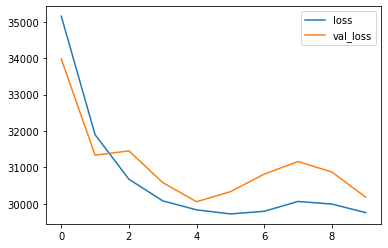

In [6]:
nombreDeNeurones = 220
# ------------------------------
nombreDeBatch = 32          # nombre de subdivisions du jeu de données
nombreDeEpoch = 20          # nombre de fois que l'on va parcourir le jeu de données
nombreDeEpochPatient = 5    # nombre d'epoch sans amélioration avant d'arrêter l'apprentissage

model = Sequential()
model.add( InputLayer(input_shape=(nombreDeNotesPrecedentes, formatNote)) )
model.add( LSTM(nombreDeNeurones, activation='relu') )
model.add( Dense(formatNote) )
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mae'])

early_stopping = EarlyStopping(
    min_delta=0.001, # quantité minimale considérable comme une amélioration
    patience=nombreDeEpochPatient,
    restore_best_weights=True,)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=nombreDeBatch,
    epochs=nombreDeEpoch,
    callbacks=[early_stopping],)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Erreur minimale atteinte : {}".format(history_df['val_loss'].min()))

In [7]:
nombreDeNeurones = 260
# ------------------------------
nombreDeBatch = 32          # nombre de subdivisions du jeu de données
nombreDeEpoch = 20          # nombre de fois que l'on va parcourir le jeu de données
nombreDeEpochPatient = 5    # nombre d'epoch sans amélioration avant d'arrêter l'apprentissage

model = Sequential()
model.add( InputLayer(input_shape=(nombreDeNotesPrecedentes, formatNote)) )
model.add( LSTM(nombreDeNeurones, activation='relu') )
model.add( Dense(formatNote) )
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mae'])

early_stopping = EarlyStopping(
    min_delta=0.001, # quantité minimale considérable comme une amélioration
    patience=nombreDeEpochPatient,
    restore_best_weights=True,)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=nombreDeBatch,
    epochs=nombreDeEpoch,
    callbacks=[early_stopping],)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Erreur minimale atteinte : {}".format(history_df['val_loss'].min()))

Epoch 1/20
30802/34145 [==========================>...] - ETA: 42s - loss: 34962.7109 - mae: 71.1208

In [ ]:
nombreDeNeurones = 300
# ------------------------------
nombreDeBatch = 32          # nombre de subdivisions du jeu de données
nombreDeEpoch = 20          # nombre de fois que l'on va parcourir le jeu de données
nombreDeEpochPatient = 5    # nombre d'epoch sans amélioration avant d'arrêter l'apprentissage

model = Sequential()
model.add( InputLayer(input_shape=(nombreDeNotesPrecedentes, formatNote)) )
model.add( LSTM(nombreDeNeurones, activation='relu') )
model.add( Dense(formatNote) )
model.compile(optimizer='rmsprop', loss='mse',  metrics=['mae'])

early_stopping = EarlyStopping(
    min_delta=0.001, # quantité minimale considérable comme une amélioration
    patience=nombreDeEpochPatient,
    restore_best_weights=True,)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=nombreDeBatch,
    epochs=nombreDeEpoch,
    callbacks=[early_stopping],)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Erreur minimale atteinte : {}".format(history_df['val_loss'].min()))